In [604]:
#packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score,precision_score,f1_score
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [605]:
#importing dataset
df=pd.read_csv("QualityPrediction.csv")

In [606]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [607]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [608]:
df.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [609]:
# checking null elements
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

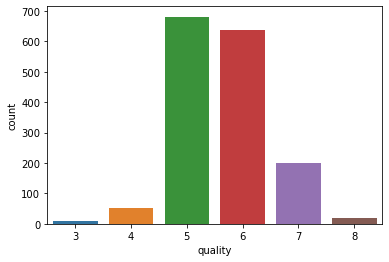

In [610]:
sns.countplot(x=df["quality"])

<font color="red">--> There are no missing values.<br>
--> Total 11 features<br>
--> All the features are continuous numerical whereas target vaiable is discrete numerical data ranging from 3 to 8.<br>
--> Dataset has very small number of obervations for quality=(3,4,8).
</font>

# Feature Scaling

In [611]:
#pd.set_option("display.max_rows", None)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


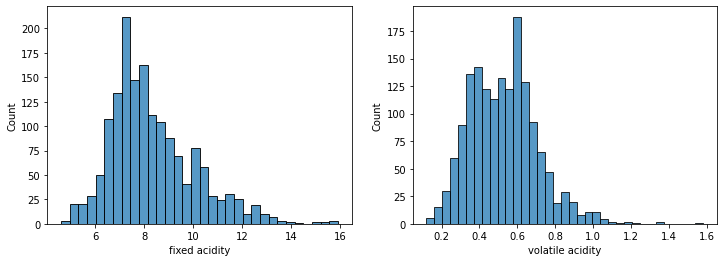

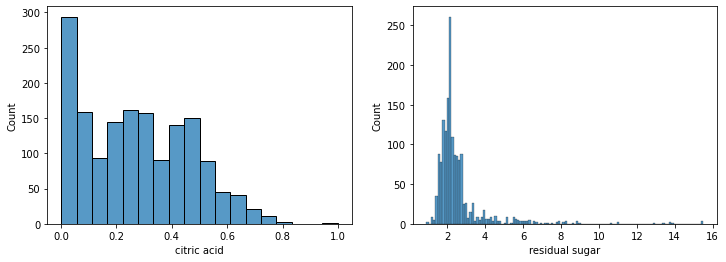

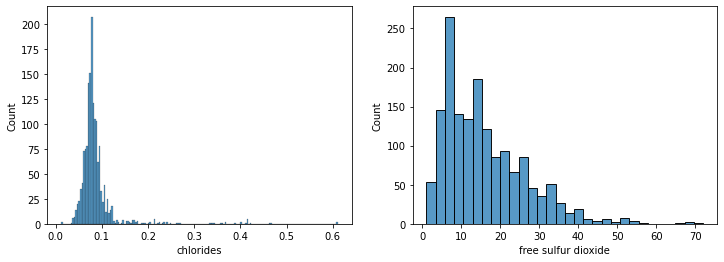

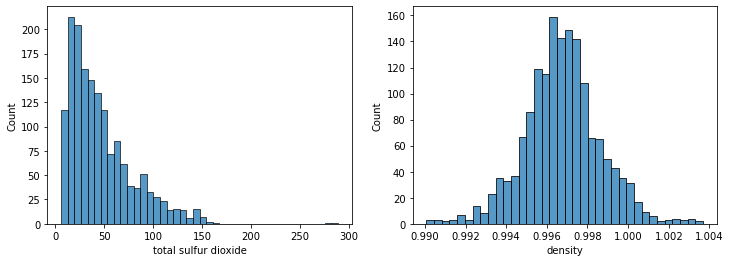

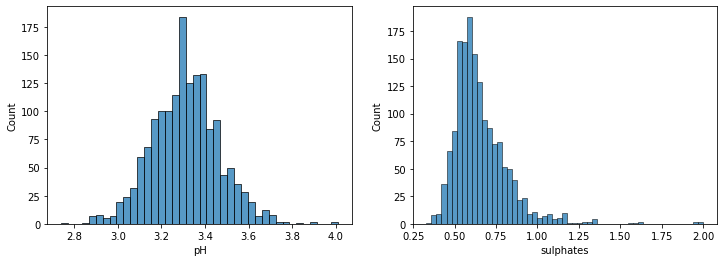

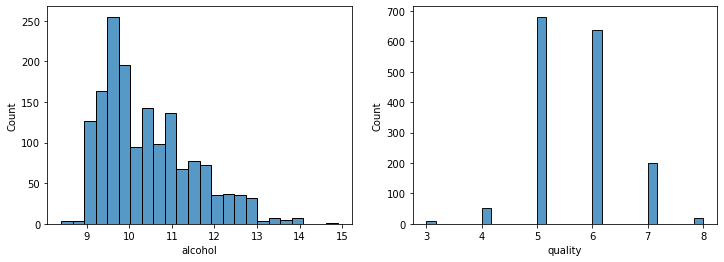

In [612]:

col=df.columns
print(col)
j=0
i=0
while j!=len(col):
    i=0
    for i in range(0,2):
        fig,axes=plt.subplots(1,2,figsize=(12,4))
        sns.histplot(df[col[j]],ax=axes[0])
        j+=1
        
        sns.histplot(df[col[j]],ax=axes[1])
        j+=1
        plt.show()


<b>Features-Total Sulfur dioxide,alcohol,citric acid,fixed acidity,free sulfur dioxide are highly skewed.Log transformation may be applied for this.</b>


# Feature Analysis using Heatmap

In [613]:
corr=df.corr()

<AxesSubplot:>

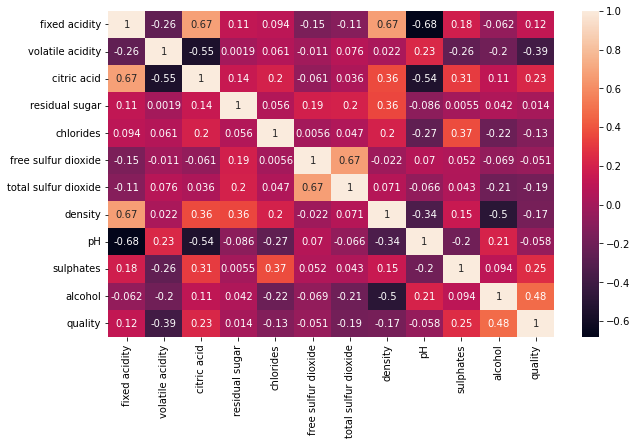

In [614]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

<b>Fixed acidity has  strong relation with density,citric acid.
total sulfur dioxide has strongly relation with free sulfur dioxide.
quality has strong relation with alcohol.
</b>

In [615]:

x=df.loc[:,[ 'volatile acidity', 'residual sugar','density',
       'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']]
y=df.iloc[:,11]
x

,volatile acidity,residual sugar,density,chlorides,free sulfur dioxide,sulphates,alcohol
0,0.700,1.9,0.99780,0.076,11.0,0.56,9.4
1,0.880,2.6,0.99680,0.098,25.0,0.68,9.8
2,0.760,2.3,0.99700,0.092,15.0,0.65,9.8
3,0.280,1.9,0.99800,0.075,17.0,0.58,9.8
4,0.700,1.9,0.99780,0.076,11.0,0.56,9.4
...,...,...,...,...,...,...,...
1594,0.600,2.0,0.99490,0.090,32.0,0.58,10.5
1595,0.550,2.2,0.99512,0.062,39.0,0.76,11.2
1596,0.510,2.3,0.99574,0.076,29.0,0.75,11.0
1597,0.645,2.0,0.99547,0.075,32.0,0.71,10.2


# Feature Scaling

<b>Standard scaler</b>

In [616]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=5)
sc= StandardScaler()
x_train_sc=sc.fit_transform(x_train.values)
x_test_sc=sc.fit_transform(x_test.values)


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.72      0.80      0.76       152
           6       0.51      0.52      0.52       115
           7       0.45      0.38      0.41        40
           8       0.00      0.00      0.00         6

    accuracy                           0.62       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.58      0.62      0.60       320



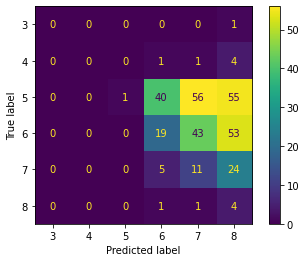

In [617]:
lr = LogisticRegression()
lr.fit(x_train_sc,y_train)
lr_predict_sc= lr.predict(x_test_sc)
print(classification_report(y_test, lr_predict_sc))
print(plot_confusion_matrix(lr,x_test,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.84      0.82      0.83       152
           6       0.61      0.77      0.68       115
           7       0.67      0.40      0.50        40
           8       1.00      0.17      0.29         6

    accuracy                           0.72       320
   macro avg       0.52      0.36      0.38       320
weighted avg       0.72      0.72      0.71       320



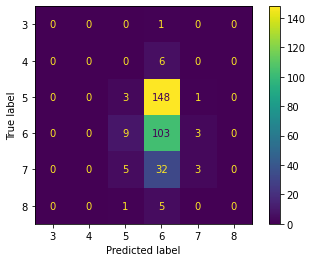

In [618]:

rfc = RandomForestClassifier()
rfc.fit(x_train_sc, y_train)
rfc_predict_sc= rfc.predict(x_test_sc)  
print(classification_report(y_test, rfc_predict_sc))
print(plot_confusion_matrix(rfc,x_test,y_test))

In [619]:
dtc=tree.DecisionTreeClassifier()
dtc.fit(x_train_sc,y_train)
dtc_predict_sc=dtc.predict(x_test_sc)
print(classification_report(y_test, dtc_predict_sc))



              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.17      0.17      0.17         6
           5       0.73      0.70      0.71       152
           6       0.47      0.46      0.46       115
           7       0.27      0.33      0.30        40
           8       0.14      0.17      0.15         6

    accuracy                           0.54       320
   macro avg       0.30      0.30      0.30       320
weighted avg       0.56      0.54      0.55       320



In [620]:
gnb = GaussianNB()
gnb.fit(x_train_sc,y_train)
gnb_predict_sc = gnb.predict(x_test_sc)
print(classification_report(y_test, gnb_predict_sc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.17      0.14         6
           5       0.74      0.77      0.75       152
           6       0.54      0.53      0.54       115
           7       0.40      0.40      0.40        40
           8       0.00      0.00      0.00         6

    accuracy                           0.61       320
   macro avg       0.30      0.31      0.31       320
weighted avg       0.60      0.61      0.60       320



<b>Log Scaling</b>

In [621]:
x_train["alcohol"]=np.log(x_train["alcohol"])
x_train["free sulfur dioxide"]=np.log(x_train["free sulfur dioxide"])
x_test["alcohol"]=np.log(x_test["alcohol"])
x_test["free sulfur dioxide"]=np.log(x_test["free sulfur dioxide"])

In [622]:
lr.fit(x_train,y_train)
lr_predict_lgt= lr.predict(x_test)
print(classification_report(y_test, lr_predict_lgt))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.71      0.81      0.75       152
           6       0.50      0.60      0.55       115
           7       0.62      0.12      0.21        40
           8       0.00      0.00      0.00         6

    accuracy                           0.62       320
   macro avg       0.31      0.26      0.25       320
weighted avg       0.59      0.62      0.58       320



In [623]:
rfc.fit(x_train, y_train)
rfc_predict_lgt= rfc.predict(x_test)  
print(classification_report(y_test, rfc_predict_lgt))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         6
           5       0.82      0.80      0.81       152
           6       0.61      0.77      0.68       115
           7       0.75      0.45      0.56        40
           8       0.50      0.17      0.25         6

    accuracy                           0.72       320
   macro avg       0.45      0.36      0.38       320
weighted avg       0.71      0.72      0.70       320



In [624]:
dtc.fit(x_train,y_train)
dtc_predict_lgt=dtc.predict(x_test)
print(classification_report(y_test, dtc_predict_lgt))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.17      0.22         6
           5       0.73      0.70      0.72       152
           6       0.52      0.58      0.55       115
           7       0.49      0.47      0.48        40
           8       0.50      0.17      0.25         6

    accuracy                           0.61       320
   macro avg       0.43      0.35      0.37       320
weighted avg       0.61      0.61      0.61       320



In [625]:
gnb.fit(x_train,y_train)
gnb_predict_lgt = gnb.predict(x_test)
print(classification_report(y_test, gnb_predict_lgt))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.25      0.17      0.20         6
           5       0.74      0.77      0.75       152
           6       0.50      0.51      0.51       115
           7       0.41      0.40      0.41        40
           8       0.00      0.00      0.00         6

    accuracy                           0.60       320
   macro avg       0.32      0.31      0.31       320
weighted avg       0.59      0.60      0.59       320



Decision tree performs better with Log scaler

# Outlier Treatment(using IQR)

In [626]:
df1=df
def remove_outlier(df, col_name):
    plt.figure(figsize=(20,20))
    f, axes = plt.subplots(1, 2,figsize=(12,4))
    sns.boxplot(data = df,x = col_name, ax=axes[0], color='skyblue').set_title("Before Outlier Removal: "+col_name)
    q1 = np.quantile(df[col_name], 0.25)
 
    # finding the 3rd quartile
    q3 = np.quantile(df[col_name], 0.75)
    med = np.median(df)

    # finding the iqr region
    iqr = q3-q1
 
    upper_limit = q3+(1.5*iqr)
    lower_limit = q1-(1.5*iqr)
    print(lower_limit,upper_limit)
    df1=df[(df[col_name]<=upper_limit) & (df[col_name]>=lower_limit) ]
    #print(df1.shape)
  
    #df[col_name] = df[col_name].apply(lambda x : lower_limit if x < (lower_limit) else (upper_limit if x>(upper_limit) else x))
    
    sns.boxplot(data = df, x = col_name, ax=axes[1], color='pink').set_title("After Outlier Removal: "+col_name)
    plt.show()
    return df1

3.95 12.349999999999998


<Figure size 1440x1440 with 0 Axes>

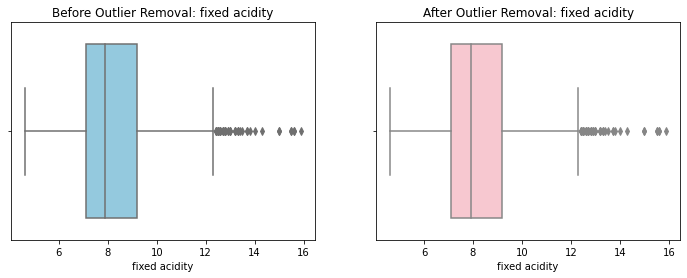

0.027500000000000024 1.0075


<Figure size 1440x1440 with 0 Axes>

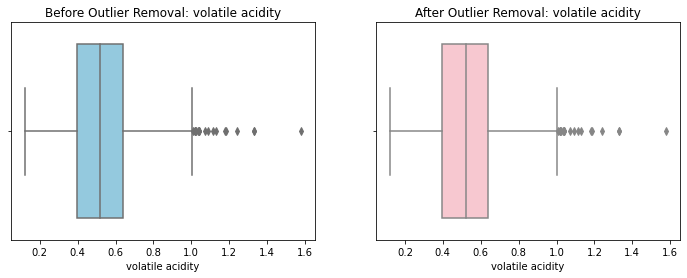

-0.3899999999999999 0.8899999999999999


<Figure size 1440x1440 with 0 Axes>

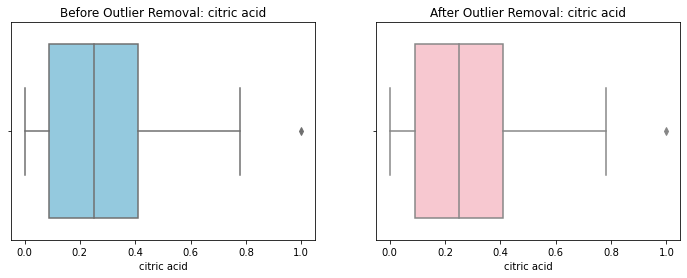

0.8499999999999996 3.6500000000000004


<Figure size 1440x1440 with 0 Axes>

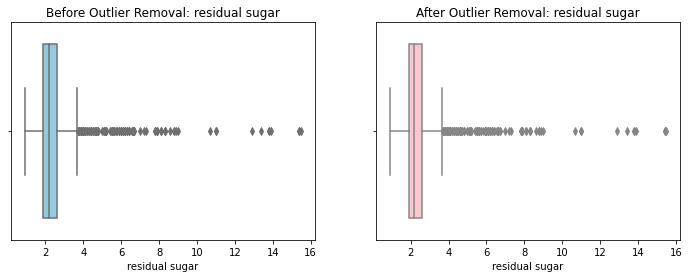

0.04150000000000002 0.11749999999999998


<Figure size 1440x1440 with 0 Axes>

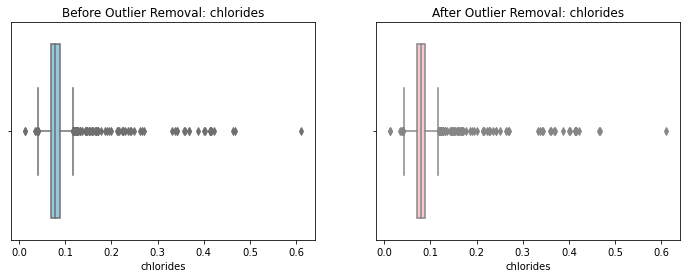

-11.5 40.5


<Figure size 1440x1440 with 0 Axes>

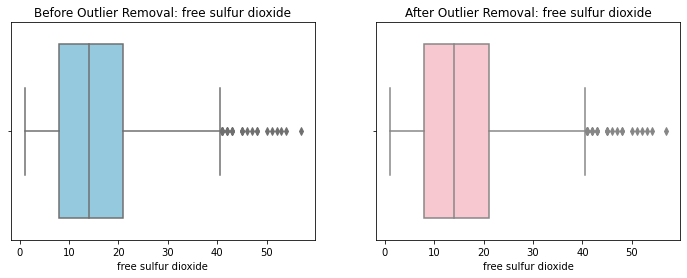

-31.625 113.375


<Figure size 1440x1440 with 0 Axes>

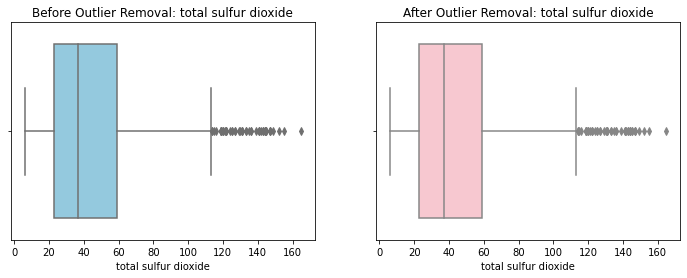

0.9924249999999999 1.0005450000000002


<Figure size 1440x1440 with 0 Axes>

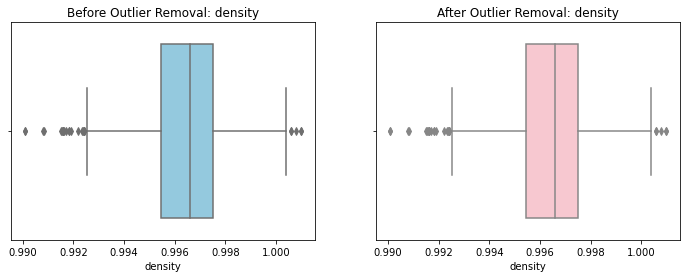

2.96 3.6800000000000006


<Figure size 1440x1440 with 0 Axes>

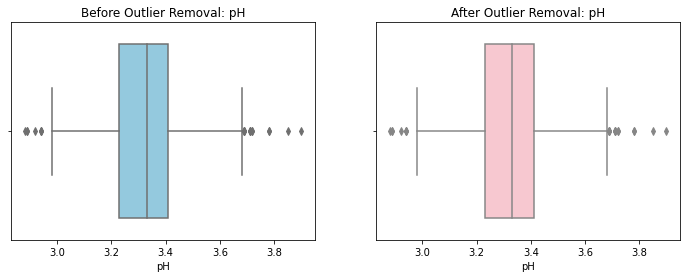

0.3137500000000001 0.94375


<Figure size 1440x1440 with 0 Axes>

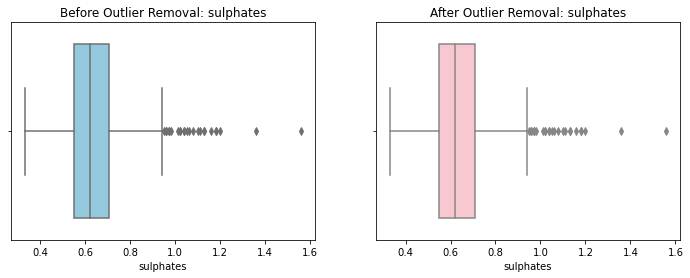

7.25 13.25


<Figure size 1440x1440 with 0 Axes>

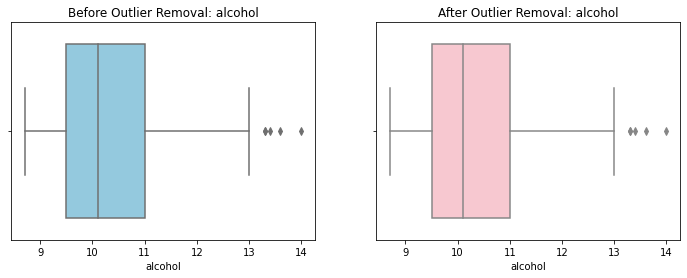

In [627]:
for col in df1.columns:
    if col!="quality":
        df1=remove_outlier(df1,col)

In [628]:

x=df1.loc[:,[ 'volatile acidity', 'residual sugar','density',
       'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']]
y=df1.iloc[:,11]

x_train, x_test, y_train, y_test_ot = train_test_split(x, y, test_size = 0.20,random_state=17)
x_train["alcohol"]=np.log(x_train["alcohol"])
x_train["free sulfur dioxide"]=np.log(x_train["free sulfur dioxide"])
x_test["alcohol"]=np.log(x_test["alcohol"])
x_test["free sulfur dioxide"]=np.log(x_test["free sulfur dioxide"])
   

In [629]:
lr.fit(x_train,y_train)
lr_predict_lgt_ot= lr.predict(x_test)
print(classification_report(y_test_ot, lr_predict_lgt_ot))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.62      0.79      0.70        99
           6       0.63      0.60      0.61       104
           7       0.67      0.12      0.20        17
           8       0.00      0.00      0.00         1

    accuracy                           0.63       227
   macro avg       0.32      0.25      0.25       227
weighted avg       0.61      0.63      0.60       227



In [630]:
rfc.fit(x_train, y_train)
rfc_predict_lgt_ot= rfc.predict(x_test)  
print(classification_report(y_test_ot, rfc_predict_lgt_ot))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.76      0.90      0.82        99
           6       0.85      0.79      0.82       104
           7       0.85      0.65      0.73        17
           8       0.00      0.00      0.00         1

    accuracy                           0.80       227
   macro avg       0.41      0.39      0.40       227
weighted avg       0.78      0.80      0.79       227



In [631]:
dtc.fit(x_train,y_train)
dtc_predict_lgt_ot=dtc.predict(x_test)
print(classification_report(y_test_ot, dtc_predict_lgt_ot))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.68      0.68      0.68        99
           6       0.67      0.63      0.65       104
           7       0.43      0.59      0.50        17
           8       0.33      1.00      0.50         1

    accuracy                           0.63       227
   macro avg       0.35      0.48      0.39       227
weighted avg       0.64      0.63      0.64       227



In [632]:
gnb.fit(x_train,y_train)
gnb_predict_lgt_ot = gnb.predict(x_test)
print(classification_report(y_test_ot, gnb_predict_lgt_ot))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.64      0.81      0.71        99
           6       0.68      0.48      0.56       104
           7       0.33      0.47      0.39        17
           8       0.00      0.00      0.00         1

    accuracy                           0.61       227
   macro avg       0.27      0.29      0.28       227
weighted avg       0.61      0.61      0.60       227



# Binary Classification

In [633]:
bins = [2,6.5, 8]
group_names = ['bad','good']
df['quality_'] = pd.cut(df['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
df['quality_'] = label_quality.fit_transform(df['quality_'])


In [634]:
x=df.loc[:,[ 'volatile acidity', 'residual sugar','density',
       'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol']]
y=df.iloc[:,12]

x_train, x_test, y_train, y_test_bin = train_test_split(x, y, test_size = 0.20,random_state=5)
x_train["alcohol"]=np.log(x_train["alcohol"])
x_train["free sulfur dioxide"]=np.log(x_train["free sulfur dioxide"])
x_test["alcohol"]=np.log(x_test["alcohol"])
x_test["free sulfur dioxide"]=np.log(x_test["free sulfur dioxide"])


In [635]:
lr.fit(x_train,y_train)
lr_predict_lgt_bin= lr.predict(x_test)
print(classification_report(y_test_bin, lr_predict_lgt_bin))


              precision    recall  f1-score   support

           0       0.87      0.99      0.92       274
           1       0.56      0.11      0.18        46

    accuracy                           0.86       320
   macro avg       0.71      0.55      0.55       320
weighted avg       0.82      0.86      0.82       320



In [636]:
rfc.fit(x_train, y_train)
rfc_predict_lgt_bin= rfc.predict(x_test)  
print(classification_report(y_test_bin, rfc_predict_lgt_bin))


              precision    recall  f1-score   support

           0       0.92      0.99      0.95       274
           1       0.88      0.46      0.60        46

    accuracy                           0.91       320
   macro avg       0.90      0.72      0.78       320
weighted avg       0.91      0.91      0.90       320



In [637]:
dtc.fit(x_train,y_train)
dtc_predict_lgt_bin=dtc.predict(x_test)
print(classification_report(y_test_bin, dtc_predict_lgt_bin))


              precision    recall  f1-score   support

           0       0.93      0.94      0.93       274
           1       0.61      0.59      0.60        46

    accuracy                           0.89       320
   macro avg       0.77      0.76      0.77       320
weighted avg       0.89      0.89      0.89       320



In [638]:
gnb.fit(x_train,y_train)
gnb_predict_lgt_bin = gnb.predict(x_test)
print(classification_report(y_test_bin, gnb_predict_lgt_bin))


              precision    recall  f1-score   support

           0       0.92      0.91      0.91       274
           1       0.49      0.50      0.49        46

    accuracy                           0.85       320
   macro avg       0.70      0.71      0.70       320
weighted avg       0.85      0.85      0.85       320



# Performance Visualization
    

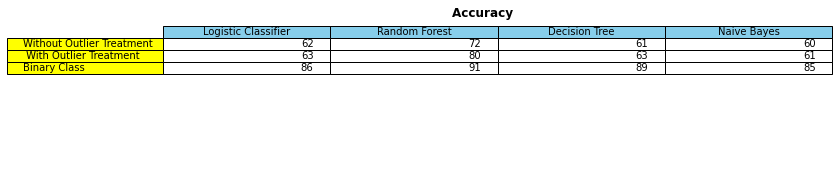

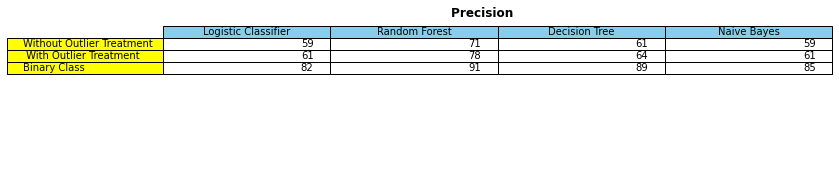

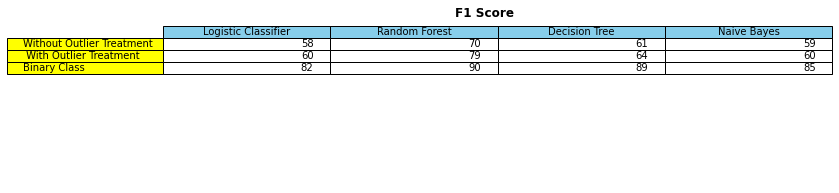

In [639]:
val1 = ["Logistic Classifier","Random Forest","Decision Tree","Naive Bayes"] 
val2 = ["Without Outlier Treatment"," With Outlier Treatment","Binary Class"] 
val3 = [list(round((accuracy_score(y_test, i)*100)) for i in [lr_predict_lgt,rfc_predict_lgt,dtc_predict_lgt,gnb_predict_lgt]),
       list(round((accuracy_score(y_test_ot, i)*100)) for i in [lr_predict_lgt_ot,rfc_predict_lgt_ot,dtc_predict_lgt_ot,gnb_predict_lgt_ot]),
       list(round((accuracy_score(y_test_bin, i)*100)) for i in [lr_predict_lgt_bin,rfc_predict_lgt_bin,dtc_predict_lgt_bin,gnb_predict_lgt_bin])] 

fig, ax = plt.subplots(figsize=(12,3)) 
ax.set_axis_off() 
table = ax.table( 
    cellText = val3,  
    rowLabels = val2,  
    colLabels = val1, 
    rowColours =["yellow"]*10, 
    colColours =["skyblue"] * 10,
    loc ='upper left',
    
    )  
ax.set_title('Accuracy ', fontweight ="bold")
fig, ax = plt.subplots(figsize=(12,3)) 
ax.set_axis_off() 
val4 = [list(round((precision_score(y_test, i, average='weighted')*100)) for i in [lr_predict_lgt,rfc_predict_lgt,dtc_predict_lgt,gnb_predict_lgt]),
       list(round((precision_score(y_test_ot, i,average='weighted')*100)) for i in [lr_predict_lgt_ot,rfc_predict_lgt_ot,dtc_predict_lgt_ot,gnb_predict_lgt_ot]),
       list(round((precision_score(y_test_bin, i,average='weighted')*100)) for i in [lr_predict_lgt_bin,rfc_predict_lgt_bin,dtc_predict_lgt_bin,gnb_predict_lgt_bin])] 
table = ax.table( 
    cellText = val4,  
    rowLabels = val2,  
    colLabels = val1, 
    rowColours =["yellow"]*10, 
    colColours =["skyblue"] * 10,
    loc ='upper left',
    
    )   
ax.set_title('Precision ', fontweight ="bold") 

fig, ax = plt.subplots(figsize=(12,3)) 
ax.set_axis_off() 
val5 = [list(round((f1_score(y_test, i, average='weighted')*100)) for i in [lr_predict_lgt,rfc_predict_lgt,dtc_predict_lgt,gnb_predict_lgt]),
       list(round((f1_score(y_test_ot, i,average='weighted')*100)) for i in [lr_predict_lgt_ot,rfc_predict_lgt_ot,dtc_predict_lgt_ot,gnb_predict_lgt_ot]),
       list(round((f1_score(y_test_bin, i,average='weighted')*100)) for i in [lr_predict_lgt_bin,rfc_predict_lgt_bin,dtc_predict_lgt_bin,gnb_predict_lgt_bin])] 
table = ax.table( 
    cellText = val5,  
    rowLabels = val2,  
    colLabels = val1, 
    rowColours =["yellow"]*10, 
    colColours =["skyblue"] * 10,
    loc ='upper left',
    
    )   
ax.set_title('F1 Score', fontweight ="bold") 


plt.show() 

<b>Best model for the dataset is Random Forest.<br>
Without outlier treatment, accuracy of model is 72%.<br>
With outlier treatment, accuracy of model is 80%.<br>
For binary classification, accuracy of model is 91%.</b><br><br>
<b>Selected features for model are <i>'volatile acidity', 'residual sugar','density', 'chlorides', 'free sulfur dioxide', 'sulphates', 'alcohol'.</i></b><br>
<b>Log Scaler performs well for decision tree and random forest.</b><br>
<b>Data was highly skewed for variable 'alcohol' and 'free sulfur dioxide'.</b><br><br>
<b>Model was erring against quality=(3,4,8).</b> 